In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [12]:
data = pd.read_csv("../input/data.csv")  # head method show only first 5 rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
data.info()    #Look at the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [16]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B
list = ['id','diagnosis','Unnamed: 32']     # unnecessary features and diagnosis = y
x = data.drop(list,axis = 1 )               # drop the selected features from data
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign: 357
Number of Malignant : 212


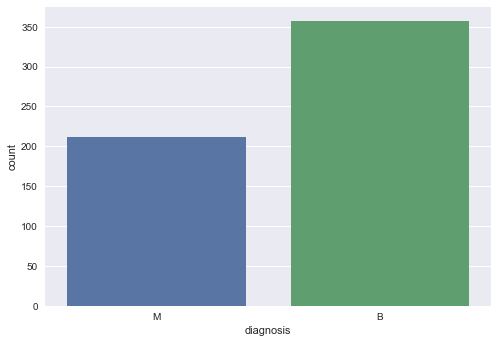

In [22]:
import seaborn as sns # data visualization library  

ax = sns.countplot(y,label="Count")       # plot the label count, M = 212, B = 357
B, M = y.value_counts()
print 'Number of Benign:', B
print 'Number of Malignant :', M

In [24]:
x.describe()   # describe the all statistical function of the data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [27]:
y= y.map({'M':1,'B':0})      # transfer diagnosis column from object type to integer value

In [28]:
y.describe()                 # this will describe the all statistical function of our data

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [36]:
x.columns       # this gives the column name which are persent in our data

Index([u'radius_mean', u'texture_mean', u'perimeter_mean', u'area_mean',
       u'smoothness_mean', u'compactness_mean', u'concavity_mean',
       u'concave points_mean', u'symmetry_mean', u'fractal_dimension_mean',
       u'radius_se', u'texture_se', u'perimeter_se', u'area_se',
       u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

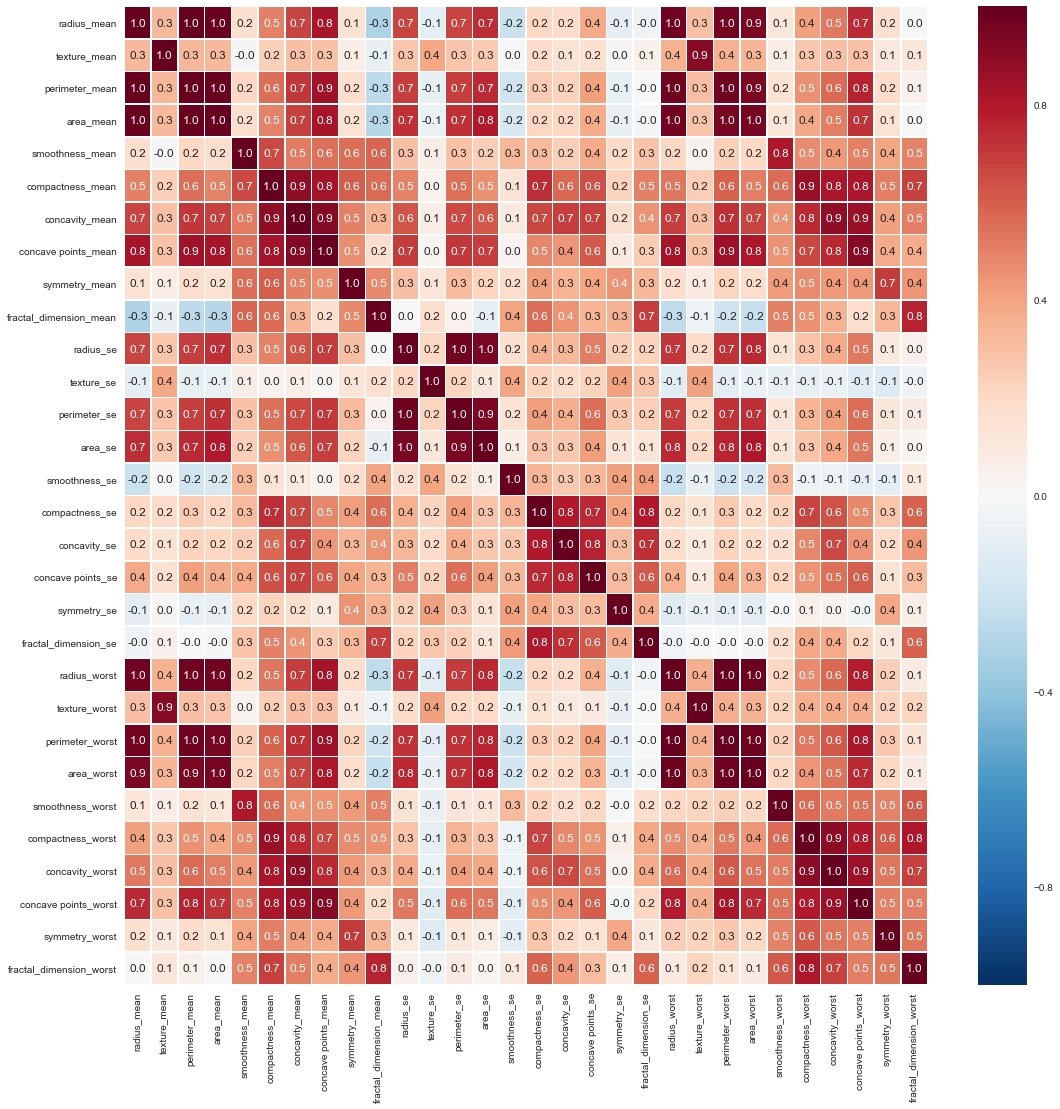

In [38]:
f,ax = plt.subplots(figsize=(18, 18))   # correlation plot with heatmap
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

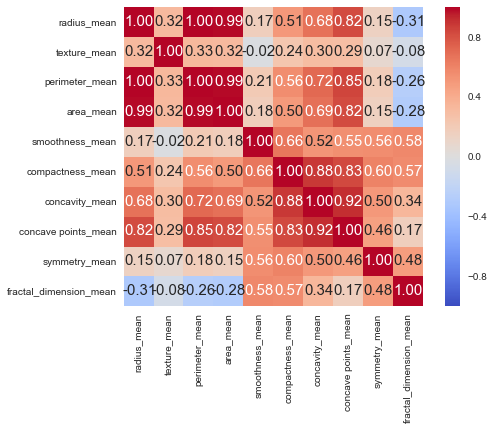

In [50]:
features_mean = x.columns[0:10]     # separate 
corr = x[features_mean].corr()      # correlation plot
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )

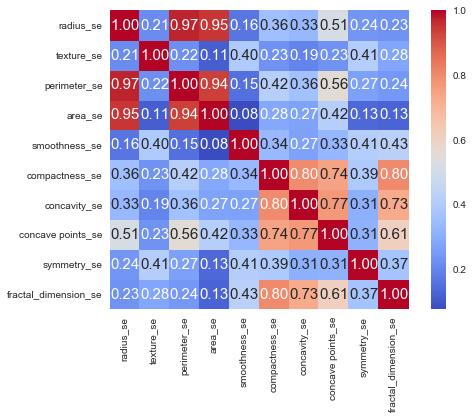

In [49]:
features_se = x.columns[10:20]    #separate
corr = x[features_se].corr()      #correlation plot
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )

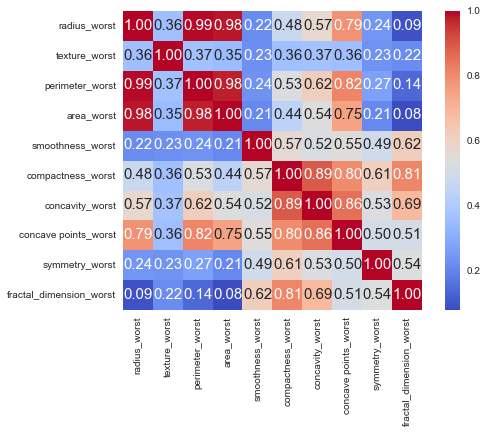

In [45]:
features_worst = x.columns[20:]   #separate
corr = x[features_worst].corr()   #correlation plot
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )

In [52]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']
x_choose = x.drop(drop_list1,axis = 1 )        # drop the correlated features
x_choose.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


('Accuracy is: ', 0.95321637426900585)


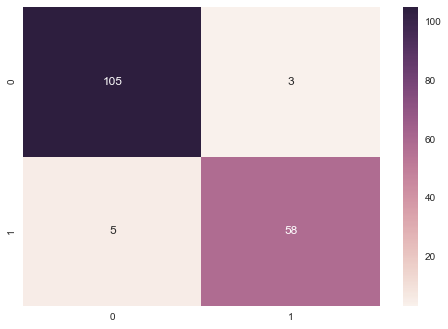

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_choose, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clf_rf = clf_rf.fit(x_train,y_train)

# Generate accuracy score and confusion matrix
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [72]:
F1_s = f1_score(y_test,clf_rf.predict(x_test))   #Caculate F1 score of Random Forest classifier
print('F1 score is: ',F1_s)

('F1 score is: ', 0.93548387096774177)


In [74]:
from sklearn import cross_validation      #import cross validation for k-fold validation
from sklearn.cross_validation import KFold, cross_val_score

Kfold = KFold(data.shape[0], n_folds = 5,shuffle = False)    #5-fold cross-validation
print("KfoldCrossVal score using Random Forest is %s" %cross_val_score(clf_rf,x_choose,y,cv=10).mean())

KfoldCrossVal score using Random Forest is 0.940401650678


('Accuracy is: ', 0.96491228070175439)


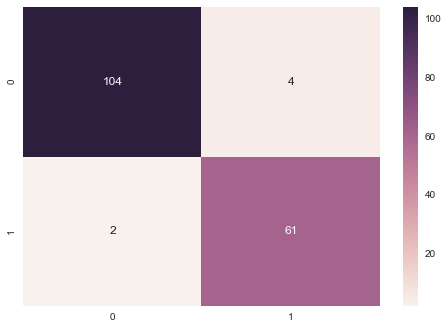

In [75]:
clf_lr = LogisticRegression()                           #use Logistic Regression as classifier
clf_lr = clf_lr.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_lr.predict(x_test))      # Generate accuracy score and confusion matrix
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_lr.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [76]:
from sklearn.metrics import f1_score

F1_s = f1_score(y_test,clf_lr.predict(x_test))     #Caculate F1 score of Logistic Regression classifier
print('F1 score is: ',F1_s)

('F1 score is: ', 0.953125)


In [77]:
Kfold = KFold(data.shape[0], n_folds = 5,shuffle = False)     #5-fold cross-validation
print("KfoldCrossVal score using Logistic regrression is %s" %cross_val_score(clf_lr,x_choose,y,cv=10).mean())

KfoldCrossVal score using Logistic regrression is 0.931691297209


('Accuracy is: ', 0.95321637426900585)


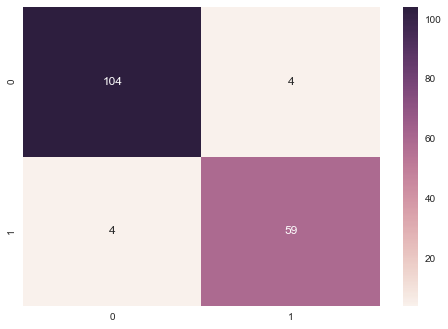

In [79]:
from sklearn.ensemble import AdaBoostClassifier

stump_clf =  DecisionTreeClassifier(random_state=42, max_depth=1)   #Define AdaBoost base estimator parameters
clf_ada = AdaBoostClassifier(base_estimator = stump_clf)  
clf_ada = clf_ada.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_ada.predict(x_test))                 # Generate accuracy score and confusion matrix
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_ada.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [80]:
F1_s = f1_score(y_test,clf_ada.predict(x_test))     #Caculate F1 score of Adaboost classifier
print('F1 score is: ',F1_s)

('F1 score is: ', 0.93650793650793651)


In [81]:
Kfold = KFold(data.shape[0], n_folds = 5,shuffle = False)     #5-fold cross-validation
print("KfoldCrossVal score using AdaBoost is %s" %cross_val_score(clf_ada,x_choose,y,cv=10).mean())

KfoldCrossVal score using AdaBoost is 0.963027180019


('Accuracy is: ', 0.6257309941520468)


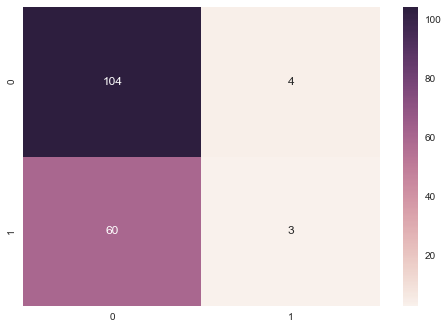

In [114]:
from sklearn.svm import SVC

clf_svm = SVC(kernel='rbf', C=10, gamma=0.1)                 #Define SVM kernel and parameters(C, gamma)
clf_svm = clf_svm.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_svm.predict(x_test))          # Generate accuracy score and confusion matrix
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_svm.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [115]:
F1_s = f1_score(y_test,clf_svm.predict(x_test))     #Caculate F1 score of SVM classifier
print('F1 score is: ',F1_s)

('F1 score is: ', 0.085714285714285715)


In [117]:
Kfold = KFold(data.shape[0], n_folds = 5,shuffle = False)     #5-fold cross-validation
print("KfoldCrossVal score using SVM is %s" %cross_val_score(clf_svm,x_choose,y,cv=10).mean())

KfoldCrossVal score using SVM is 0.630966424682


In [85]:
from sklearn import preprocessing               #scale the dataset for SVM

x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

('Accuracy is: ', 0.95906432748538006)


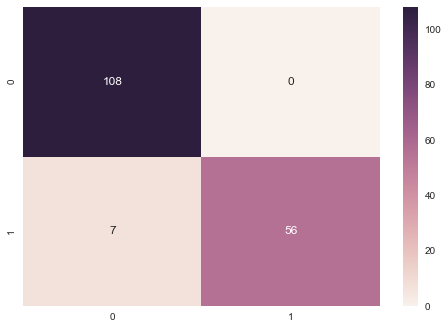

In [118]:
from sklearn.svm import SVC

clf_svm1 = SVC(kernel='rbf', C=10, gamma=0.1)                      #Define SVM kernel and parameters(C, gamma)
clf_svm1 = clf_svm1.fit(x_train_scaled,y_train)

ac = accuracy_score(y_test,clf_svm1.predict(x_test_scaled))        # Generate accuracy score and confusion matrix
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_svm1.predict(x_test_scaled))
sns.heatmap(cm,annot=True,fmt="d")

In [119]:
F1_s = f1_score(y_test,clf_svm1.predict(x_test_scaled))     #Caculate F1 score of SVM classifier with scaled dataset
print('F1 score is: ',F1_s)

('F1 score is: ', 0.94117647058823528)


In [120]:
Kfold = KFold(data.shape[0], n_folds = 5,shuffle = False)     #5-fold cross-validation
print("KfoldCrossVal score using SVM_scaled is %s" %cross_val_score(clf_svm1,x_choose,y,cv=10).mean())

KfoldCrossVal score using SVM_scaled is 0.630966424682


('Accuracy is: ', 0.98245614035087714)


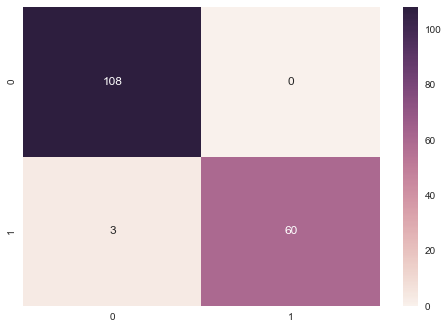

In [110]:
from sklearn.svm import SVC

clf_svm2 = SVC(kernel='linear', C=1, gamma=0.1)                    #Change SVM kernel from "rbf" to "linear"
clf_svm2 = clf_svm2.fit(x_train_scaled,y_train)

ac = accuracy_score(y_test,clf_svm2.predict(x_test_scaled))        # Generate accuracy score and confusion matrix
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_svm2.predict(x_test_scaled))
sns.heatmap(cm,annot=True,fmt="d")

In [111]:
F1_s = f1_score(y_test,clf_svm2.predict(x_test_scaled))     #Caculate F1 score of SVM classifier kernel=linear
print('F1 score is: ',F1_s)

('F1 score is: ', 0.97560975609756095)


In [112]:
Kfold = KFold(data.shape[0], n_folds = 5,shuffle = False)   #5-fold cross-validation
print("KfoldCrossVal score using SVM_linear is %s" %cross_val_score(clf_svm2,x_choose,y,cv=10).mean())

KfoldCrossVal score using SVM_linear is 0.941971307579
